In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import joblib

In [5]:
df = pd.read_csv("C:/Users/Ravali/Downloads/OASIS TASK 3/car data.csv")   
print("Dataset Shape:", df.shape)
print(df.head())

Dataset Shape: (301, 9)
  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  


In [7]:
print(df.isnull().sum())

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


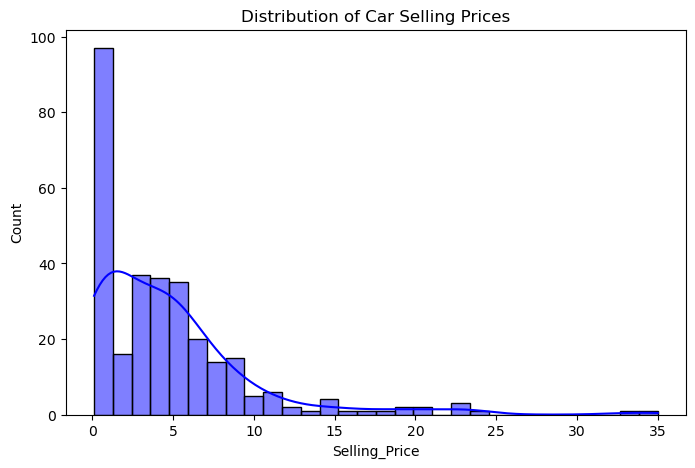

In [9]:
plt.figure(figsize=(8,5))
sns.histplot(df['Selling_Price'], kde=True, bins=30, color='blue')
plt.title("Distribution of Car Selling Prices")
plt.show()

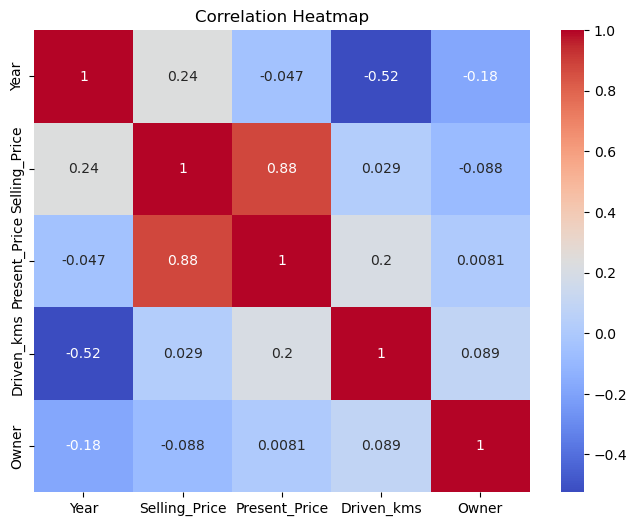

In [13]:
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()


for col in ['Fuel_Type', 'Seller_Type', 'Transmission']:
    if col in df.columns:
        df[col] = le.fit_transform(df[col])

print(df.head())


  Car_Name  Year  Selling_Price  Present_Price  Driven_kms  Fuel_Type  \
0     ritz  2014           3.35           5.59       27000          2   
1      sx4  2013           4.75           9.54       43000          1   
2     ciaz  2017           7.25           9.85        6900          2   
3  wagon r  2011           2.85           4.15        5200          2   
4    swift  2014           4.60           6.87       42450          1   

  Selling_type  Transmission  Owner  
0       Dealer             1      0  
1       Dealer             1      0  
2       Dealer             1      0  
3       Dealer             1      0  
4       Dealer             1      0  


In [19]:
X = df.drop(columns=['Selling_Price', 'Car_Name'])  # drop target + name column
y = df['Selling_Price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [23]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)


X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)


In [25]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [33]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
def evaluate(y_true, y_pred, model_name):
    print(f"\n{model_name} Performance:")
    print("R² Score:", r2_score(y_true, y_pred))
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
evaluate(y_test, y_pred_lr, "Linear Regression")
evaluate(y_test, y_pred_rf, "Random Forest")



Linear Regression Performance:
R² Score: 0.8466902419661776
MAE: 1.221932362175591
RMSE: 1.8792498207990767

Random Forest Performance:
R² Score: 0.9622027874670378
MAE: 0.6217081967213116
RMSE: 0.9331028260242413


In [35]:
joblib.dump(rf, "car_price_model.pkl")
print("\n✅ Model saved as car_price_model.pkl")


✅ Model saved as car_price_model.pkl


In [ ]:
sample = X_test.iloc[0:1]
print("\nSample Features:\n", sample)
print("Predicted Price:", rf.predict(sample)[0])
print("Actual Price:", y_test.iloc[0])